# Overview
Using a daily updated global pandemic data set, we seek to understand how COVID-19 is affecting people of various ages to predict the number of deaths and to determine the effect of GDP on pandemic response and vice versa. The target population is global, broken down by country, using descriptive and analytical methods, we aim to answer the question not asked by other sources. This pandemic has hugely disrupted world economies and gleaning meaningful insights by applying the data science strategies that we have learnt so far on relevant data can help us learn about any changing trends or outlier observations and be more prepared in these challenging times.

# Data Pre-processing

#### Understanding structure of data 
 - Identifying Continuous and Categorical data
 - Handling Missing data
 - Methods to identify outliers
 - Measuring centrality of data
 - Measuring spread of data

#### Loading required libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import sklearn.ensemble as ske
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
import datetime as dt
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()
from pandas.api.types import CategoricalDtype
from plotnine import *
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt
import statsmodels.formula.api as sm
# to avoid warnings appearing on the displayed notebook
import warnings
warnings.filterwarnings('ignore')

In [70]:
# Setting Max rows and columns for full visibility
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [71]:
# Install plotnine if not avialable
!pip install pandas plotnine
from plotnine import *

## Reading Data

In [72]:
df = pd.read_csv("data/owid-covid-data.csv",parse_dates=['date'])

## Understanding structure of data

#### Looking at top 10 rows of data
We take a look at the top 10 rows of data to get a beginning idea of what structure the data is in that we will be working with. Here, we can clearly see each column, as well as that it will be separated by country. We also see that we have ‘date’ in the dataset which will act as in index when data is checked over time.

In [73]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [74]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
33407,NaN,NaN,International,2020-02-23,634.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33408,NaN,NaN,International,2020-02-24,691.0,57.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33409,NaN,NaN,International,2020-02-25,691.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33410,NaN,NaN,International,2020-02-26,691.0,0.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33411,NaN,NaN,International,2020-02-27,705.0,14.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33412,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33413,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33414,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33415,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33416,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the last 10 rows in the dataset shows we have few rows which are tagged as "International" and do not tie to anyone
continent.

#### Looking at all the variables and their types
Variables and data types can be very helpful when pre-processing data. Knowing all of this information will allow us to handle the data more accurately and allow us to correct the data more easily.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 34 columns):
iso_code                           33353 non-null object
continent                          33141 non-null object
location                           33417 non-null object
date                               33417 non-null datetime64[ns]
total_cases                        33062 non-null float64
new_cases                          33062 non-null float64
total_deaths                       33062 non-null float64
new_deaths                         33062 non-null float64
total_cases_per_million            32998 non-null float64
new_cases_per_million              32998 non-null float64
total_deaths_per_million           32998 non-null float64
new_deaths_per_million             32998 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_tho

There are 33417 observations and 34 columns where 5 variables are of categorical data type and the remaining 29 variables are of numerical data types. 

Looking at the column names, the dataset provides us information about total number of COVID cases, tests and deaths by continent and by different age brackets. It also has information about per capitia, life expectancy, death rate by cardiovsacular and diabetes on a daily basis.

#### Converting data types
As mentioned above, knowing the data type is very useful for handling the data and correcting it. Here we are converting the data into data types that we can more effectively use. This is crucial for the date when we start using it for time.


In [76]:
df['date']=df['date'].dt.strftime("%m-%d-%Y")

In [77]:
df['date']= pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [78]:
df = df.set_index('date')
df.head(3)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


#### Describing and Summarizing numerical or continuous variables

In [10]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.306200e+04,33062.000000,33062.000000,33062.00000,32998.000000,32998.000000,32998.000000,32998.000000,10401.000000,1.064700e+04,10647.000000,10401.000000,11520.000000,11520.000000,27130.000000,3.335300e+04,31910.000000,30074.000000,29638.000000,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,13764.000000,27353.000000,32951.000000
mean,5.091939e+04,1010.762809,2655.291634,39.93243,1103.657007,17.858746,40.909829,0.533204,16320.258341,7.689958e+05,30.980448,0.572316,15589.503906,0.551412,58.327987,9.443562e+07,368.561392,31.634754,9.450372,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,53.246010,3.146980,74.244388
std,5.180225e+05,9309.139517,25233.329557,347.73264,2674.940362,62.928423,123.250689,3.006846,59168.420750,3.022411e+06,55.964699,1.104416,54168.666654,0.979232,29.773501,6.370159e+08,1680.063490,9.012636,6.375376,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,31.456423,2.549325,7.316460
min,0.000000e+00,-29726.000000,0.000000,-1918.00000,0.000000,-437.881000,0.000000,-41.023000,-3743.000000,1.000000e+00,0.000000,-0.398000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,2.100000e+01,0.000000,0.000000,0.00000,8.521500,0.000000,0.000000,0.000000,805.000000,2.585100e+04,1.437000,0.049000,903.000000,0.051000,37.960000,1.701583e+06,39.497000,24.400000,3.607000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,4.460000e+02,5.000000,9.000000,0.00000,155.458000,0.773000,2.043000,0.000000,2766.000000,1.105140e+05,8.105000,0.221000,3115.000000,0.239000,67.590000,8.655541e+06,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.860000
75%,5.066500e+03,102.000000,107.000000,2.00000,936.628000,10.572000,21.692000,0.140000,9307.000000,4.324700e+05,38.056000,0.693000,9528.250000,0.691000,81.940000,3.236600e+07,222.873000,39.800000,14.864000,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,1.670892e+07,284710.000000,660123.000000,10512.00000,38138.741000,4944.376000,1237.551000,200.040000,929838.000000,5.063568e+07,638.167000,20.611000,801014.000000,15.456000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


There are some negative numbers as seen in the above output. For example, new_cases column has a min value of -29726. 
As this is the number of test cases so we cannot have negative values. Looks like a data error. Similarly, we have 
other such columns which are negatives - new_deaths, new_cases_per_million, new_deaths_per_million, new_tests
and new_tests_per_thousand.  We will handle these errors later.

In [11]:
# Taking a look at the outcome variable: 'total_deaths'
print(df['total_deaths'].value_counts())

0.0         10059
1.0          2053
2.0           972
3.0           805
5.0           595
10.0          546
7.0           520
6.0           519
9.0           515
4.0           467
8.0           402
11.0          347
12.0          279
13.0          266
15.0          241
21.0          224
14.0          186
19.0          185
24.0          179
26.0          167
22.0          163
31.0          161
28.0          151
20.0          135
17.0          135
23.0          128
42.0          124
18.0          123
30.0          123
25.0          118
16.0          111
51.0          110
52.0          106
58.0          105
50.0          100
53.0          100
69.0           99
27.0           96
29.0           89
32.0           88
34.0           88
35.0           87
41.0           87
33.0           82
40.0           82
46.0           82
36.0           73
45.0           67
48.0           66
38.0           66
49.0           63
56.0           63
47.0           63
110.0          62
55.0           61
43.0      

### Feature Selection
#### Dropping unnecessary and redundant numerical columns before analyzing data

In [12]:
df.isna().sum()

iso_code                              64
continent                            276
location                               0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older                       3498
gdp_per_capita  

There are a total number of 33417 observations and the following variables have more than 60% of data as missing values. 

new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units, and the variable "handwashing_facilities"  has 19653 close to 60% of data as missing values.

Therefore, these variables should be removed in order to avoid any bias in modeling. The variable extreme_poverty is also having 40% of its values as missing values. However, we will try to consider this variable as it has less than 50% of its missing values. 

In [79]:
df.drop(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities'], axis = 1, inplace = True)

The below mentioned variables should also be removed as these are conversions per million. We would prefer to use per million numbers in general compared to just numbers, however, there are more missing values in variables using per million as conversions. Therefore, we stick to the original variables.

total_cases_per_million, new_cases_per_million, total_deaths_per_million, and new_deaths_per_million

In [80]:
df.drop(['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million'], axis = 1, inplace = True)

Also, total cases should include new cases and total deaths should include new deaths, Therefore, we can remove new cases and new deaths from our data to avoid redundancy.

In [81]:
df.drop(['new_cases', 'new_deaths'], axis = 1, inplace = True)

Because Population Density is calculated using Population, we need to remove Population

In [82]:
df.drop(['population'], axis = 1, inplace = True)

#### Describing and Summarizing categorical variables

In [16]:
df.describe(include = 'O')

,iso_code,continent,location
count,33353,33141,33417
unique,211,6,212
top,LTU,Europe,Russia
freq,212,9113,212


#### Drop specific rows

Looking at the categorical variables. Some of the rows for iso_code has no values and corresponding continent also doesn't have any values. Also, the corresponding location has only "International" as the values. This means there is no way to track which location in these rows belongs to which continent and such. Therefore, we should remove these rows. There are only 64 such rows with no values in iso_code variables. Therefore, removing such a small data will not affect our model. 

In [83]:
df = df.dropna(how='all', subset=['iso_code'])

#### Looking at shape of the new dataset 

We now have 33353 observations instead of 33417 observations and 18 variables instead of 34 variables.

In [15]:
df.shape

(33353, 18)

All the names of variables in our current data set are listed below

In [13]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [20]:
df.describe()

,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
count,3.299800e+04,32998.000000,27130.000000,31910.000000,30074.000000,29638.000000,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,27353.000000,32951.000000
mean,5.101779e+04,2660.440057,58.327987,368.561392,31.634754,9.450372,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,3.146980,74.244388
std,5.185198e+05,25257.517537,29.773501,1680.063490,9.012636,6.375376,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,2.549325,7.316460
min,0.000000e+00,0.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000
25%,2.100000e+01,0.000000,37.960000,39.497000,24.400000,3.607000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,1.380000,70.390000
50%,4.470000e+02,9.000000,67.590000,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,2.540000,75.860000
75%,5.105500e+03,108.000000,81.940000,222.873000,39.800000,14.864000,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,4.210000,80.100000
max,1.670892e+07,660123.000000,100.000000,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,13.800000,86.750000


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

We can observe that now with our already reduced data the variable extreme poverty has almost 40% values missing and therefore the better way would be to delete this column as imputing it would lead to misleading results. 



In [ ]:
df.drop(['extreme_poverty'], axis = 1, inplace = True)

In [ ]:
df.shape

## Graphical Exploratory Analysis

Before we go deeper into the dataset, it is good to perform some graphical exploratory analysis as we can quickly see and find issues with the data

#### GDP
GDP, or gross domestic product is a good representation of how a country is faring economically. Here we will be comparing the GDP of countries and how it affects the number of cases, but also the reaction to the pandemic.

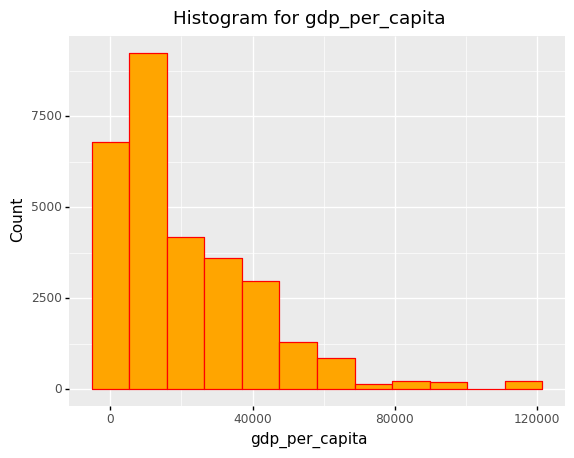

<ggplot: (-9223371911521653581)>

In [14]:
(ggplot(df, aes(x='gdp_per_capita'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for gdp_per_capita", x="gdp_per_capita", y="Count")
)

#### Median Age

Like GDP, we are looking at the median age in a histogram. This is telling us what the ages look like that were being tested. We can see that the most tested age group was in their early 40s.


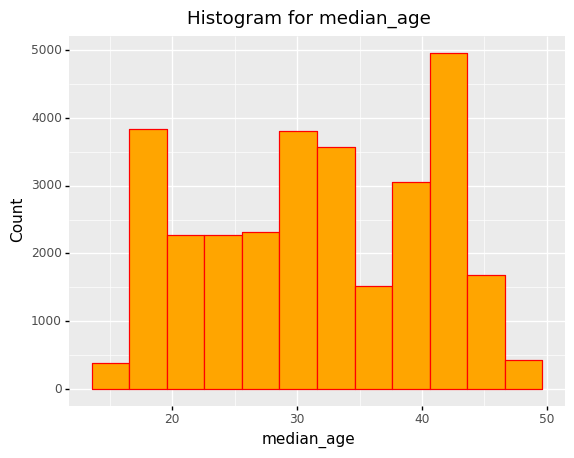

<ggplot: (125334952680)>

In [15]:
(ggplot(df, aes(x='median_age'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for median_age", x="median_age", y="Count")
)

#### Number of Cases vs Deaths

Text(0.5, 1.0, 'Total Number of Cases vs Total Deaths')

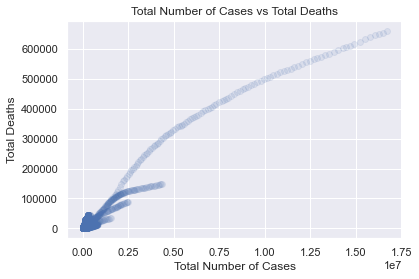

In [23]:
plt.scatter(df['total_cases'], df['total_deaths'], alpha = 0.1)
plt.xlabel("Total Number of Cases")
plt.ylabel("Total Deaths")
plt.title("Total Number of Cases vs Total Deaths")

As you can see, with the number of cases growing, deaths will also grow. This can be caused by a number of factors, for example, a country could be performing a large amount of test in a short time frame, much like the US.

#### Distribution of all Numerical Variables

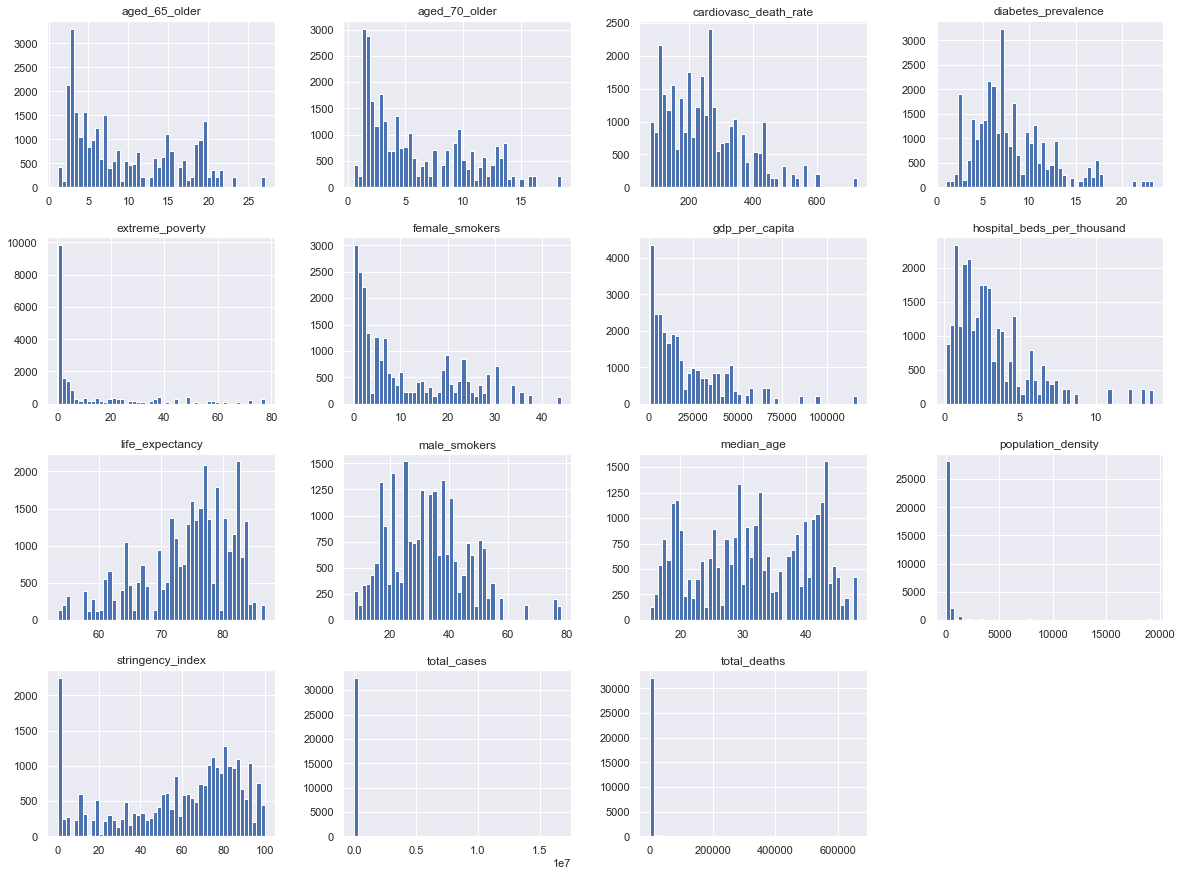

In [13]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

Out of the above graphs, we look at the hospital beds per thousand, the graph is left skewed indicating that majority of the hospitals have few beds. In times of a resource crunch, fewer beds and more cases can be a stress on the hospitals and might lead to compromise in health care services offered to patients not just seeking COVID treatment but any other conditions as well.

## Analysis for Daily Cases

In [21]:
datewise = df.groupby(["date"]).agg({"total_cases" : "sum", "total_deaths" : "sum"})

In [22]:
print("Total Number of Cases: ", datewise["total_cases"].iloc[-1])
print("Total Number of Deaths: ", datewise["total_deaths"].iloc[-1])
print("Total Number of Active Cases ", (datewise["total_cases"].iloc[-1] - datewise["total_deaths"].iloc[-1]))

Total Number of Cases:  33136534.0
Total Number of Deaths:  1291803.0
Total Number of Active Cases  31844731.0


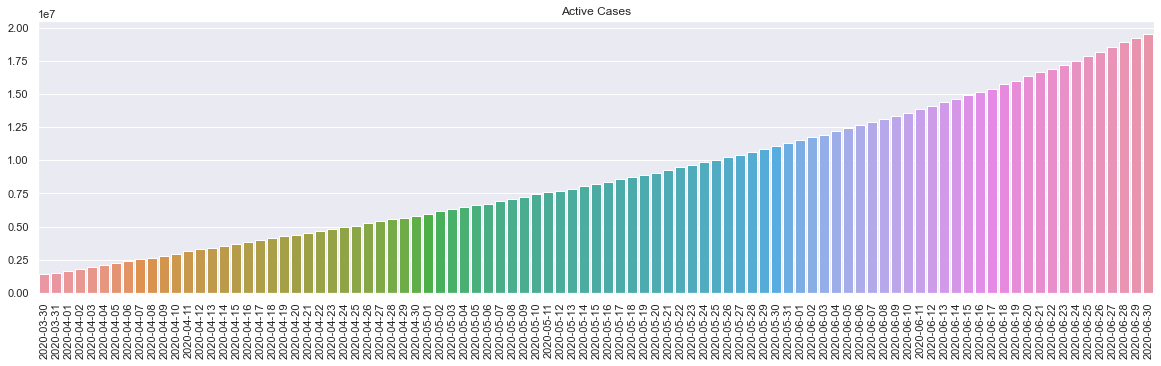

In [23]:
#sampling to view data closely on a more recent sample of records to comprehend recent trend better compared to looking at 
# 30K+ records together 
datewise_sample = datewise[datewise.index.to_series().between('2020-03-30', '2020-06-30')]

plt.figure(figsize = (20, 5))
sns.barplot(x = datewise_sample.index.date, y = datewise_sample["total_cases"] - datewise_sample["total_deaths"])
plt.title("Active Cases")
plt.xticks(rotation = 90)
plt.show()

Sadly, but as expected, the number of cases have been increasing as you can see above.

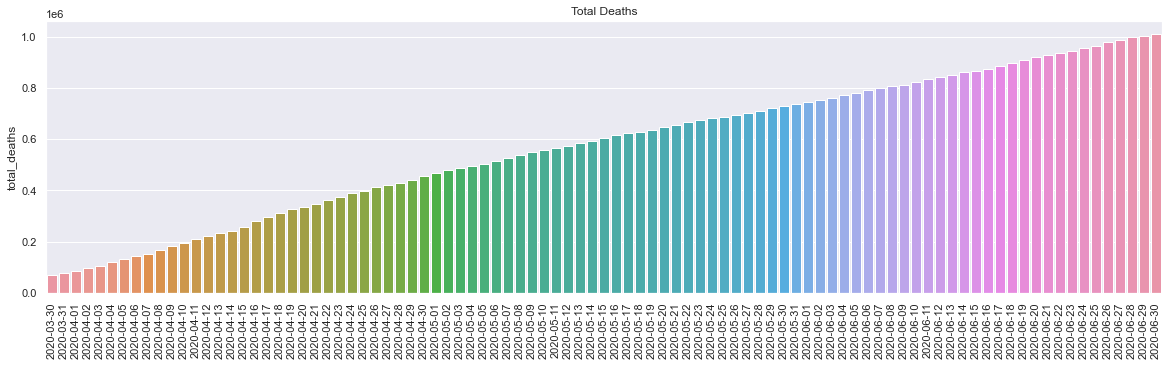

In [22]:
plt.figure(figsize = (20, 5))
sns.barplot(x = datewise_sample.index.date, y = datewise_sample["total_deaths"])
plt.title("Total Deaths")
plt.xticks(rotation = 90)
plt.show()

As well as the number of deaths increasing.

## Analysis for Weekly Cases

Text(0.5, 1.0, 'Weekly Analysis of Cases')

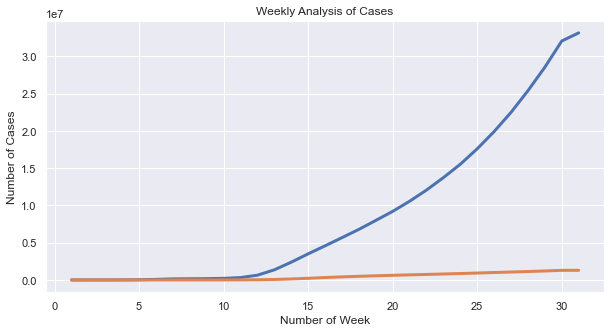

In [23]:
datewise["WeekofYear"] = datewise.index.weekofyear
num_week = []
weekly_cases = []
weekly_deaths = []

w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekly_cases.append(datewise[datewise["WeekofYear"] == i]["total_cases"].iloc[-1])
    weekly_deaths.append(datewise[datewise["WeekofYear"] == i]["total_deaths"].iloc[-1])    
    num_week.append(w)
    w = w+1
    
plt.figure(figsize = (10, 5))
plt.plot(num_week, weekly_cases, label = "Weekly Cases", linewidth = 3)
plt.plot(num_week, weekly_deaths, label = "Weekly Deaths", linewidth = 3)
plt.xlabel("Number of Week")
plt.ylabel("Number of Cases")
plt.title("Weekly Analysis of Cases")

As you can see, after about 10 weeks, the number of cases start to grow exponentially.

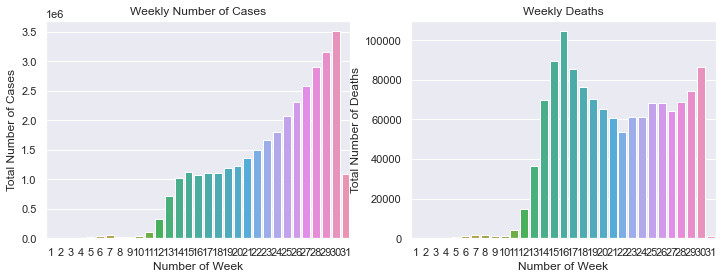

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.barplot(x = num_week, y = pd.Series(weekly_cases).diff().fillna(0), ax = ax1)
sns.barplot(x = num_week, y = pd.Series(weekly_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Number of Week")
ax2.set_xlabel("Number of Week")
ax1.set_ylabel("Total Number of Cases")
ax2.set_ylabel("Total Number of Deaths")
ax1.set_title("Weekly Number of Cases")
ax2.set_title("Weekly Deaths")
plt.show()

Curiously, you can see that there was a fall off in the number of deaths, but that it then began to rise again.

Average number of cases increasing everyday:  156304.0
Average number of deaths increasing everyday:  6093.0


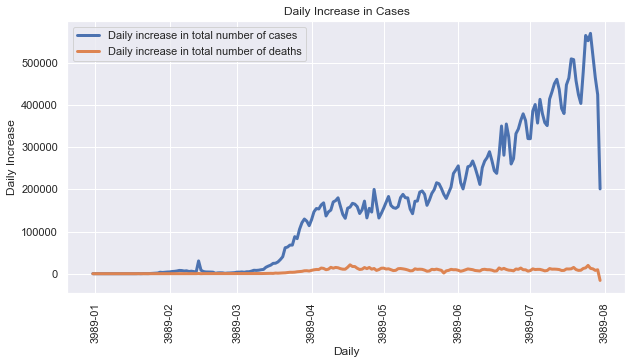

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
print("Average number of cases increasing everyday: ", np.round(datewise["total_cases"].diff().fillna(0).mean()))
print("Average number of deaths increasing everyday: ", np.round(datewise["total_deaths"].diff().fillna(0).mean()))

plt.figure(figsize = (10, 5))
plt.plot(datewise["total_cases"].diff().fillna(0), label = "Daily increase in total number of cases", linewidth = 3)
plt.plot(datewise["total_deaths"].diff().fillna(0), label = "Daily increase in total number of deaths", linewidth = 3)
plt.xlabel("Daily")
plt.ylabel("Daily Increase")
plt.title("Daily Increase in Cases")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

## Analysis by Continent

### Number of Observations per Continent

In [37]:
df.groupby('continent').size()

continent
Africa           7479
Asia             8274
Europe           9113
North America    5047
Oceania          1253
South America    1975
dtype: int64

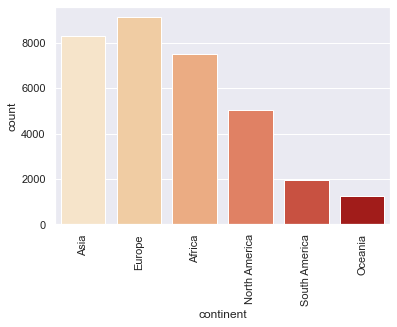

In [20]:
sns.countplot(x='continent',data=df, palette="OrRd")
plt.xticks(rotation = 90)
plt.show()

The above graph shows that Europe has the largest number of observations in the data.

### Exploring Total Number of Cases and Total Number of Deaths by Continent

In [24]:
by_continent = df[df.index == df.index.max()].groupby(["continent"]).agg({"total_cases" : "sum", "total_deaths" : "sum", "gdp_per_capita" : "sum", "population_density" : "sum"})

In [25]:
by_continent["deaths %"] = (by_continent["total_deaths"]/by_continent["total_cases"])*100

In [26]:
by_continent.head()

,total_cases,total_deaths,gdp_per_capita,population_density,deaths %
continent,,,,,
Africa,873331.0,18471.0,288523.368,5485.100,2.115006
Asia,4053864.0,92728.0,976155.985,19582.162,2.287398
Europe,2495240.0,173495.0,1366873.611,29988.597,6.953039
North America,5146329.0,209663.0,584691.580,8928.663,4.074030
Oceania,17078.0,197.0,93260.722,605.862,1.153531


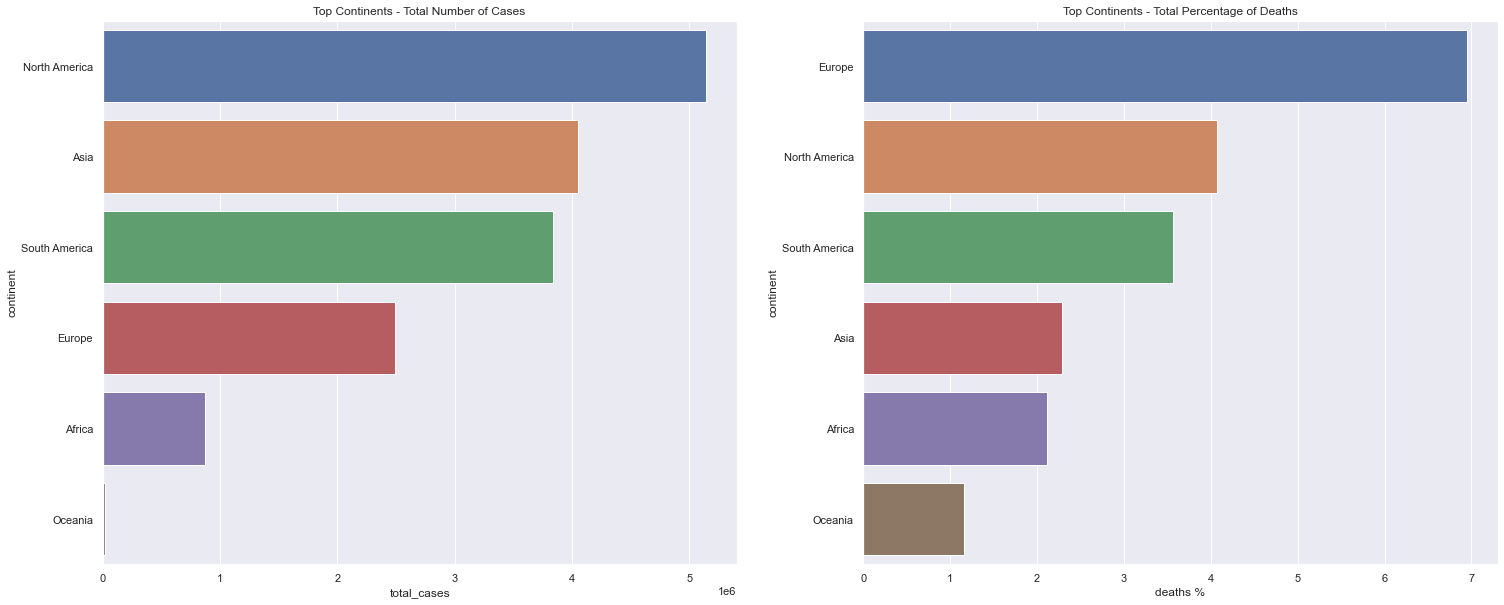

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
top_total_cases = by_continent.sort_values(["total_cases"], ascending = False).head(10)
top_total_deaths = by_continent.sort_values(["deaths %"], ascending = False).head(10)
sns.barplot(x = top_total_cases["total_cases"], y = top_total_cases.index, ax = ax1)
ax1.set_title("Top Continents - Total Number of Cases")
sns.barplot(x = top_total_deaths["deaths %"], y = top_total_deaths.index, ax = ax2)
ax2.set_title("Top Continents - Total Percentage of Deaths")

plt.show()

From the above charts, it is clearly seen that North America has the highest number of cases and second highest percentage of deaths. South America ranks number third in total number of cases and in total percentage of deaths. Surprisingly, Asia has second highest number of cases and less percentage of deaths (only 2.2%). This might be due to several factors. But one of the reasons can be the inaccuracy in reporting the number of cases/deaths and another reason can be their stronger immune system. Europe also surprisingly has very less number of cases, but ranks number one in total percentage of deaths. Again, there can be several factors associated with this, however, one reason can be Europe is not taking the same procautions as other continents.

### Exploring Continents by GDP

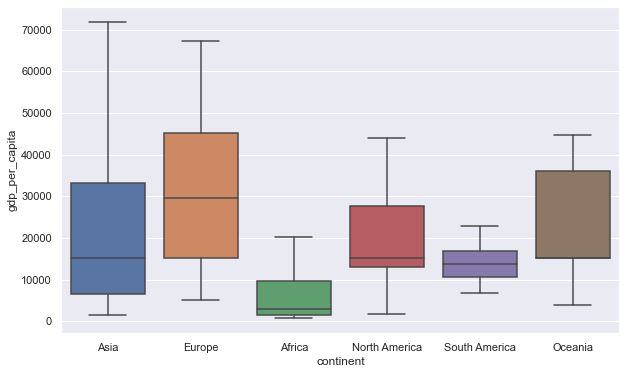

In [43]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=df, showfliers=False)

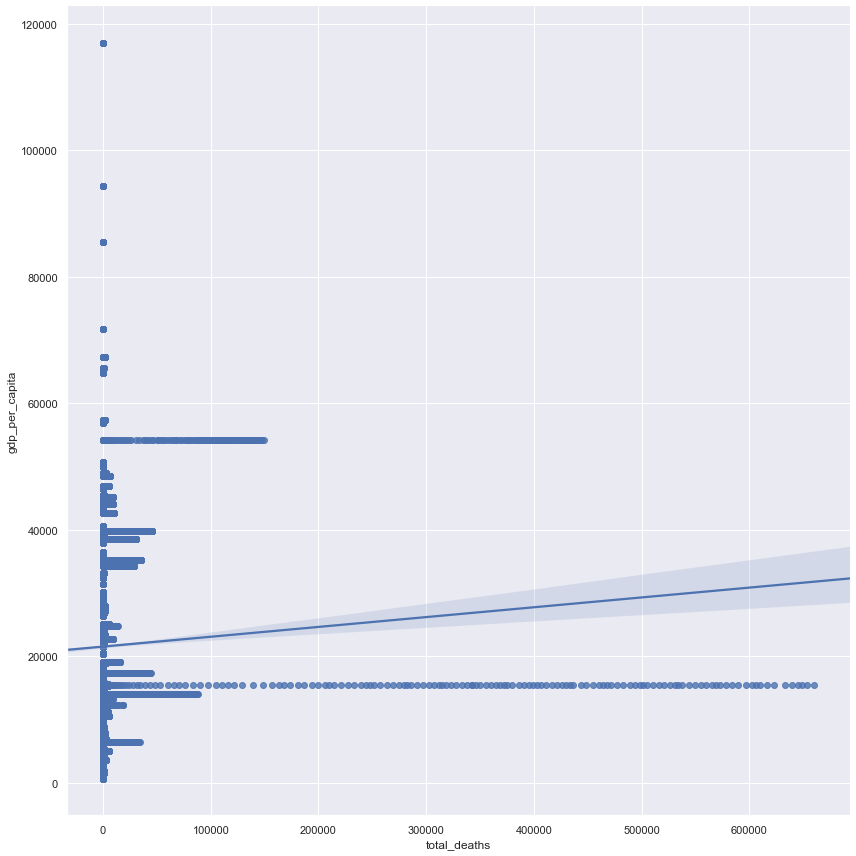

In [68]:
# trying to understand any relation between gdp and total deaths
sns.lmplot(y='gdp_per_capita',x='total_deaths',data=df, size=12)

We can observe from the above plot that the total deaths are more for poorer countries but we cannot be very sure, as there is a spike very close to 60,000 which can be deemed as countries with higher gdp. Still a significant portion of deaths are still in the lesser gdp range. Which might indicate a disparity between life expectancy between richer and poorer countries.

### Exploring population density per continent

The below chart shows that the population density is highest in North America followed by Asia, Europe, Africa, Oceana, and last South America. Therefore, even though Europe seem to have highest number of deaths and North America among the least number of deaths, it is important to consider that North America has higher population density compared to Europe.  

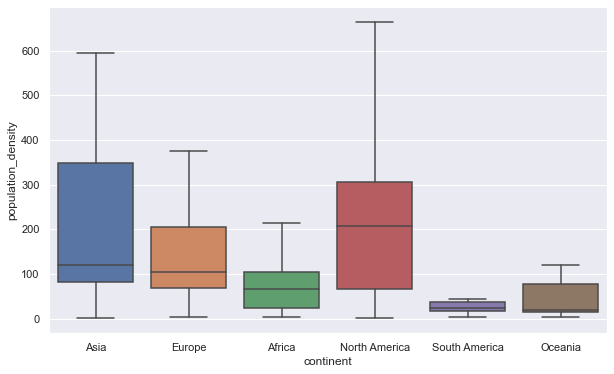

In [44]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="population_density", data=df, showfliers=False)

The first box plot shows that Europe and Oceania have the highest GDP of all of continents. Oceania has the second least population density, which could attribute to it having the least amount of deaths. However, Europe on the other hand, is among the richest continents, ranks third in population density and ranks 4th in total number of cases, and still has the highest number of total deaths. So, it will be interesting to study Europe among all the continents and help them predict total number of deaths ahead of time. This will help Europe in managing the situation better to some extent.

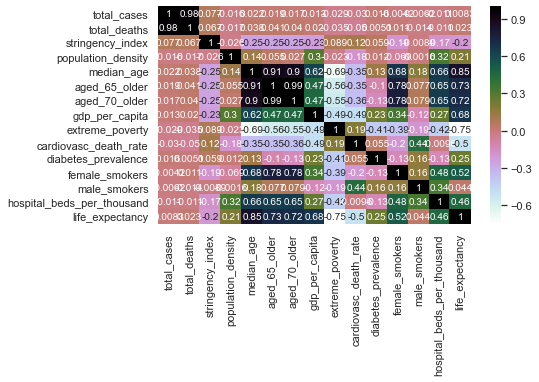

In [19]:
# heatmap for the correlation matrix
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

This heatmap shows the correlation between the different categories. This allows us to see how the different categories may effect each other. We can observe that median_age, aged_65_older and aged_70_older are correlated. We will include only median_age and aged_65_older in our model to avoid noise.

In [86]:
df.drop(['aged_70_older'], axis = 1, inplace = True)
df.dtypes

iso_code                       object
continent                      object
location                       object
total_cases                   float64
total_deaths                  float64
stringency_index              float64
population_density            float64
median_age                    float64
aged_65_older                 float64
gdp_per_capita                float64
cardiovasc_death_rate         float64
diabetes_prevalence           float64
female_smokers                float64
male_smokers                  float64
hospital_beds_per_thousand    float64
life_expectancy               float64
dtype: object

### Studying Europe

In [87]:
df_eu = df[df['continent'] == "Europe"]
df_eu = df_eu.drop("continent", axis=1)

df_eu.head()

,iso_code,location,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,
2020-03-09,ALB,Albania,2.0,0.0,36.11,104.871,38.0,13.188,11803.431,304.195,10.08,7.1,51.2,2.89,78.57
2020-03-10,ALB,Albania,6.0,0.0,41.67,104.871,38.0,13.188,11803.431,304.195,10.08,7.1,51.2,2.89,78.57
2020-03-11,ALB,Albania,10.0,0.0,51.85,104.871,38.0,13.188,11803.431,304.195,10.08,7.1,51.2,2.89,78.57
2020-03-12,ALB,Albania,11.0,1.0,51.85,104.871,38.0,13.188,11803.431,304.195,10.08,7.1,51.2,2.89,78.57
2020-03-13,ALB,Albania,23.0,1.0,78.70,104.871,38.0,13.188,11803.431,304.195,10.08,7.1,51.2,2.89,78.57


In [33]:
datewise_europe = df_eu.groupby(df_eu.index).agg({"total_cases" : "sum", "total_deaths" : "sum"})

In [34]:
print("Total Number of Cases in Europe: ", datewise_europe["total_cases"].iloc[-1])
print("Total Number of Deaths in Europe: ", datewise_europe["total_deaths"].iloc[-1])
print("Total Number of Active Cases in Europe ", (datewise_europe["total_cases"].iloc[-1] - datewise_europe["total_deaths"].iloc[-1]))

Total Number of Cases in Europe:  2495240.0
Total Number of Deaths in Europe:  173495.0
Total Number of Active Cases in Europe  2321745.0


### Exploring the regions within Europe

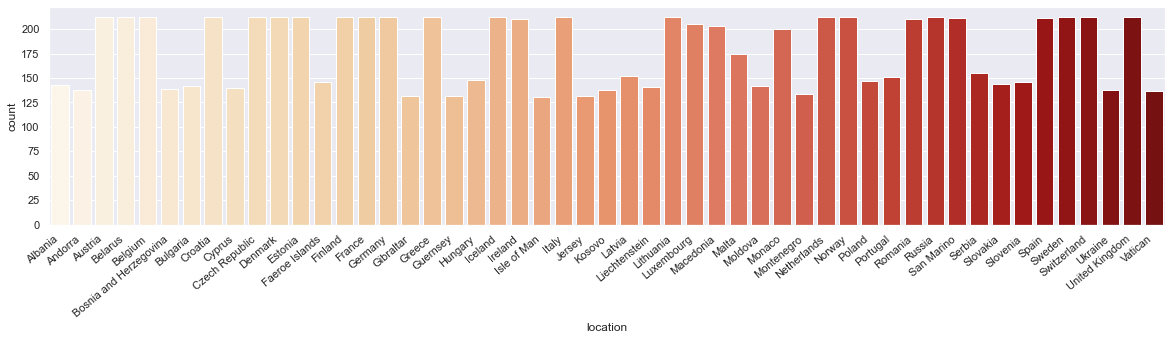

In [35]:
plt.figure(figsize=(20,4))
ax = sns.countplot(x ='location',data=df_eu, palette="OrRd")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [36]:
by_location = df_eu[df_eu.index == df_eu.index.max()].groupby(["location"]).agg({"total_cases" : "sum", "total_deaths" : "sum"}).sort_values(["total_cases"], ascending = False)

In [37]:
by_location.head()

,total_cases,total_deaths
location,,
Russia,823515.0,13504.0
United Kingdom,300692.0,45878.0
Italy,246488.0,35123.0
Germany,206926.0,9128.0
France,183804.0,30223.0


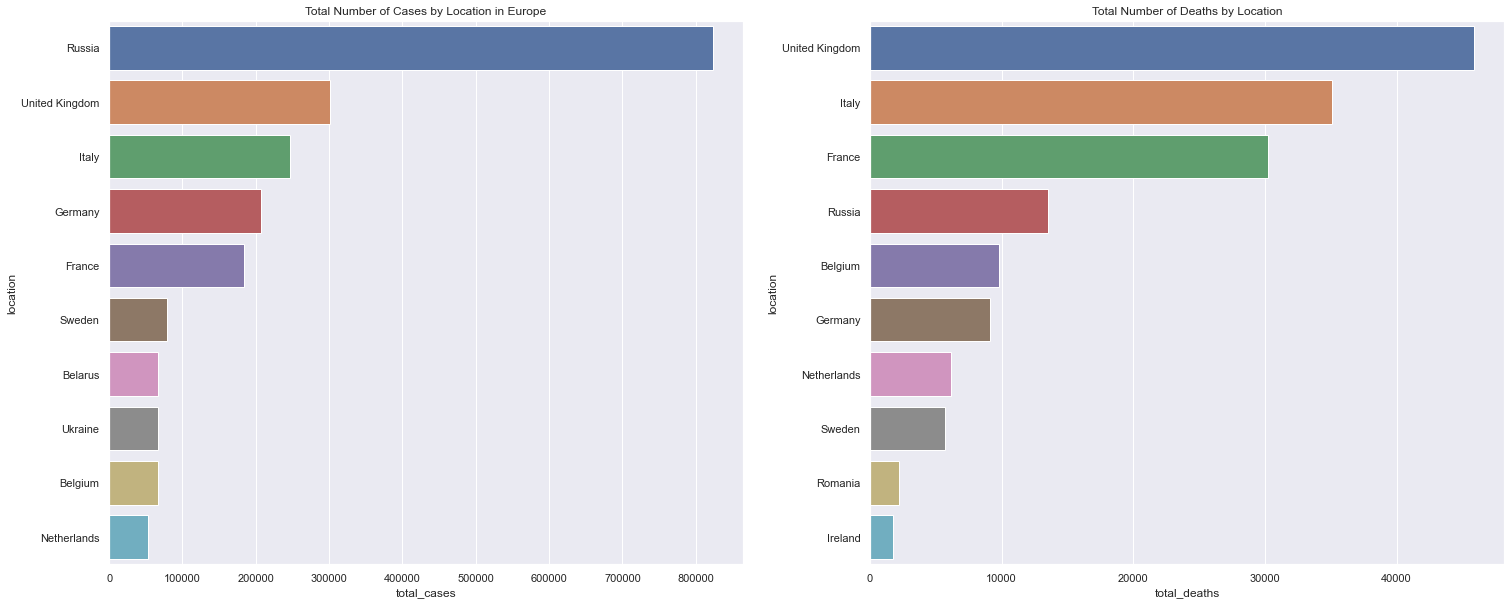

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
loc_cases = by_location.sort_values(["total_cases"], ascending = False).head(10)
loc_deaths = by_location.sort_values(["total_deaths"], ascending = False).head(10)
sns.barplot(x = loc_cases["total_cases"], y = loc_cases.index, ax = ax1)
ax1.set_title("Total Number of Cases by Location in Europe")
sns.barplot(x = loc_deaths["total_deaths"], y = loc_deaths.index, ax = ax2)
ax2.set_title("Total Number of Deaths by Location")

plt.show()

The above results show that Russia has the highest number of cases, but the United Kingdom has the highest number of deaths.

In [88]:
# Getting dummy variables
df_eu = pd.get_dummies(df_eu, columns = ['iso_code', 'location'], drop_first = True)

In [40]:
# Describing the numeric columns
df_eu.describe(include = [np.number])

,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,iso_code_AND,iso_code_AUT,iso_code_BEL,iso_code_BGR,iso_code_BIH,iso_code_BLR,iso_code_CHE,iso_code_CYP,iso_code_CZE,iso_code_DEU,iso_code_DNK,iso_code_ESP,iso_code_EST,iso_code_FIN,iso_code_FRA,iso_code_FRO,iso_code_GBR,iso_code_GGY,iso_code_GIB,iso_code_GRC,iso_code_HRV,iso_code_HUN,iso_code_IMN,iso_code_IRL,iso_code_ISL,iso_code_ITA,iso_code_JEY,iso_code_LIE,iso_code_LTU,iso_code_LUX,iso_code_LVA,iso_code_MCO,iso_code_MDA,iso_code_MKD,iso_code_MLT,iso_code_MNE,iso_code_NLD,iso_code_NOR,iso_code_OWID_KOS,iso_code_POL,iso_code_PRT,iso_code_ROU,iso_code_RUS,iso_code_SMR,iso_code_SRB,iso_code_SVK,iso_code_SVN,iso_code_SWE,iso_code_UKR,iso_code_VAT,location_Andorra,location_Austria,location_Belarus,location_Belgium,location_Bosnia and Herzegovina,location_Bulgaria,location_Croatia,location_Cyprus,location_Czech Republic,location_Denmark,location_Estonia,location_Faeroe Islands,location_Finland,location_France,location_Germany,location_Gibraltar,location_Greece,location_Guernsey,location_Hungary,location_Iceland,location_Ireland,location_Isle of Man,location_Italy,location_Jersey,location_Kosovo,location_Latvia,location_Liechtenstein,location_Lithuania,location_Luxembourg,location_Macedonia,location_Malta,location_Moldova,location_Monaco,location_Montenegro,location_Netherlands,location_Norway,location_Poland,location_Portugal,location_Romania,location_Russia,location_San Marino,location_Serbia,location_Slovakia,location_Slovenia,location_Spain,location_Sweden,location_Switzerland,location_Ukraine,location_United Kingdom,location_Vatican
count,9027.000000,9027.000000,7207.000000,8712.000000,7475.000000,7475.000000,7824.000000,7613.000000,8165.000000,7410.000000,7410.000000,8027.000000,8711.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.00000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.00000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000,9113.000000
mean,24474.764374,2088.278609,47.684135,650.715591,42.144187,17.862396,35119.094811,220.870109,6.363129,23.401538,34.752227,5.166233,80.007628,0.015143,0.023263,0.023263,0.015582,0.015253,0.023263,0.023263,0.015363,0.023263,0.023263,0.023263,0.023154,0.023263,0.023263,0.023263,0.016021,0.023263,0.014485,0.014485,0.023263,0.023263,0.016241,0.014375,0.023044,0.023263,0.023263,0.014485,0.015472,0.023263,0.022495,0.016679,0.021947,0.015582,0.022276,0.019203,0.014704,0.023263,0.023263,0.015143,0.016131,0.01657,0.023044,0.023263,0.023154,0.017009,0.015802,0.016021,0.023263,0.015143,0.015033,0.015143,0.023263,0.023263,0.023263,0.015253,0.015582,0.023263,0.015363,0.023263,0.023263,0.023263,0.016021,0.023263,0.023263,0.023263,0.014485,0.023263,0.014485,0.016241,0.023263,0.023044,0.014375,0.023263,0.014485,0.015143,0.016679,0.015472,0.023263,0.022495,0.022276,0.

### Handling missing values for modeling

This is another key part of repairing the data set. Here we are detecting any data points listed as null and replacing them with the median value for that variable. There are several missing values in this dataset. Therefore, we first need to handle these missing values in numerical variables before proceeding further. We will use SimpleImputer for this.

In [ ]:
df_eu.isnull().sum()

In [89]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_eu)
df_eu = pd.DataFrame(data=imputer.transform(df_eu) , columns=df_eu.columns)

In [90]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df_eu.drop('total_deaths', 1)
y = df_eu.total_deaths

#### Linear Regression

Firstly, we are performing a linear regression on our EU data frame to understand the impact of GDP, demographic factors like age, prevalence of smoking, life expectancy, median age, location total cases.

In [91]:
# Feature Scaling and linear regression
scaler = StandardScaler() 
reg = LinearRegression()
steps = [('scaling', scaler), ('regression', reg)] 
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test) 
pipeline.score(X_test, y_test)


0.7056947175729044

In [45]:
print("The intercept term of the linear model:", reg.intercept_)
cdf = pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

The intercept term of the linear model: 1937.5359203858027


,Coefficients
total_cases,4.424019e+03
stringency_index,4.235631e+02
population_density,-1.269335e+16
median_age,-5.474976e+14
aged_65_older,4.290657e+16
gdp_per_capita,1.954309e+16
cardiovasc_death_rate,3.823562e+16
diabetes_prevalence,7.592991e+16
female_smokers,-1.570508e+16
male_smokers,-4.930419e+15


From the model we can see that the accuracy shown is 70.5% , we can also get the intercept and the coefficients. But we need to check if this model is valid with plotting the residuals for normality and residuals versus predicted for homoscedasticity.

<AxesSubplot:title={'center':'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

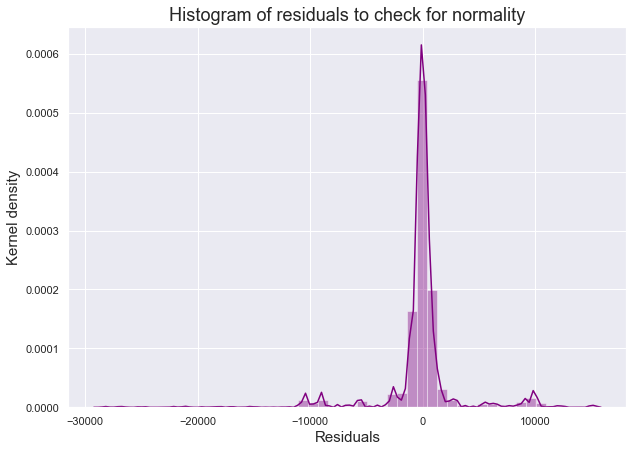

In [46]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=18)
plt.xlabel("Residuals",fontsize=15)
plt.ylabel("Kernel density", fontsize=15)
sns.distplot([y_test-np.round(y_pred)],color='purple')

This plot shows us that the residuals though might seem like normally distributed but narrower plot are not normally distributed.

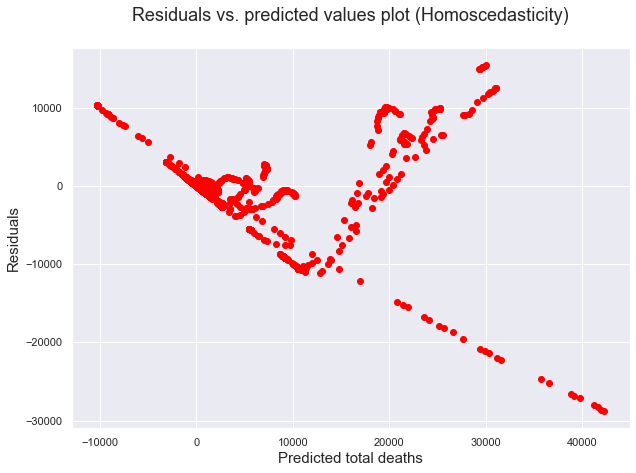

In [47]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=18)
plt.xlabel("Predicted total deaths",fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.scatter(x=np.round(y_pred),y=y_test-np.round(y_pred),color='red')

We can also observe from the residuals vs predicted plot that this data set is not good for a linear regression model.

#### Decision Tree Model

The linear regression model gives us an accuracy score of 70.8% but this event related to covid and demographic analysis has to be analysed on another parameter rather than just a linear model as we cannot get an exact view of these relations in just linear format. Thus let's model with decision tree.

In [48]:
def train_score_regressor(sklearn_regressor, X_train, y_train, X_test, y_test, model_parameters, print_oob_score=False):
    """A helper function that:
        - Trains a regressor on training data
        - Scores data on training and test data
        - Returns a trained model
    """
    # Step 1: Initializing the sklearn regressor 
   
    regressor = sklearn_regressor(**model_parameters)  
    # Step 2: Training the algorithm using the X_train dataset of features and y_train, the associated target features

    regressor.fit(X_train, y_train)
    y_pred1 = regressor.predict (X_train)
    y_pred2 = regressor.predict (X_test)
   
    # Step 3: Calculating the score of the predictive power on the training and testing dataset.
    
    print ('Train score: %.3f' % r2_score(y_train, np.round(y_pred1)))
    print ('Test score: %.3f' % r2_score(y_test, np.round(y_pred2)))
          
    print(regressor)
    return regressor

In [49]:
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters={'random_state':100})

Train score: 1.000
Test score: 1.000
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')


This clearly shows that it the decision tree is overfitting to the data. Let's get the best parameters with GridSearchCV and conduct hyperparameter tuning.

In [50]:
# Setting parameters to search through
parameters = {"max_depth":[3,4,5],
              "max_leaf_nodes":[2,3,4]}
decision_regressor= DecisionTreeRegressor(random_state=100)

# Initialize GridSearch and then fit
regressor=GridSearchCV(decision_regressor,parameters)
regressor.fit(X_train, y_train)
print(regressor)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [51]:
regressor.best_estimator_.get_params()

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 100,
 'splitter': 'best'}

In [52]:
# evaluating the tuned model
trained_regressor = train_score_regressor(sklearn_regressor=DecisionTreeRegressor,
                                          X_train=X_train, 
                                          y_train=y_train, 
                                          X_test=X_test, 
                                          y_test=y_test, 
                                          model_parameters=regressor.best_estimator_.get_params())

Train score: 0.924
Test score: 0.918
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=4, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')


We can observe from the results above that the decision tree model performs better once tuned with GridSearchCV to find the best possible parameters to understand the total deaths with gdp and age parameters for different locations across Europe. The train score is 92.4% and the test score is 91.8%. This shows that the model is well tuned to predict the total deaths very closely.

# Conclusion

We tried a regresion model based on location details to predict total deaths and got an accurancy of 70.5%. But the evaluation shows a different picture regarding the usefulness of the data set for linear regression. Our decision tree model showed signs of overfitting in the beginning but once tuned it gave a better accuracy of 91.8% on test set. This is very helpful to take proactive measures at locations which might be prone to be hotspots based on prior trends that we have captured for the same. Moving beyond the data set that we worked with, continuous data input would greatly improve the accuracy of our models over time. The data sets we’re working with are volatile, subject to change as spikes in infections can occur. With more data, the models would be able to predict future outcomes more reliably and help us predict future hotspots, whether by age, GDP or other variables.